<a href="https://colab.research.google.com/github/elvispreakerebi/pca/blob/main/PCA_Formative_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

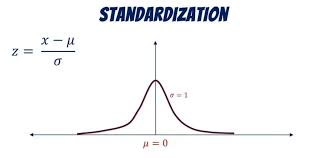


In [1]:
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('/content/student_exam_scores.csv')

# Drop rows with any NaN values
df.dropna(inplace=True)

# Select only numerical columns for standardization
numerical_df = df.select_dtypes(include=np.number)

# Step 1: Load and Standardize the data (use of numpy only allowed)
# Convert the DataFrame to a NumPy array
data = numerical_df.values

# Calculate mean and standard deviation using NumPy
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)

# Standardize the data using the formula: (Data - Data Mean) / Data's Standard Deviation
standardized_data = (data - data_mean) / data_std

print("Standardized Data:")
print(standardized_data[:5])  # Display the first few rows of standardized data

Standardized Data:
[[ 0.52015399  1.45842605 -0.19206098 -1.39523036 -0.55444379]
 [-1.56108322  1.32450263 -0.99407384 -0.75521643 -1.32224878]
 [-0.72237569  1.05665579 -0.07949777  1.22882674  0.27242311]
 [-0.8776919  -1.22004236  1.42603516 -0.05120111  0.00664447]
 [ 0.86184965 -0.148655    1.05316953  0.26880585  0.93686974]]


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [2]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data.T)  # Calculate covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 1.00502513e+00  7.82555793e-02 -3.14684351e-02  6.94253277e-02
   7.80654709e-01]
 [ 7.82555793e-02  1.00502513e+00  5.74776000e-04 -1.95227177e-01
   1.89167824e-01]
 [-3.14684351e-02  5.74776000e-04  1.00502513e+00  5.22191525e-02
   2.26846839e-01]
 [ 6.94253277e-02 -1.95227177e-01  5.22191525e-02  1.00502513e+00
   4.33271067e-01]
 [ 7.80654709e-01  1.89167824e-01  2.26846839e-01  4.33271067e-01
   1.00502513e+00]]


### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [3]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition
eigenvalues, eigenvectors

(array([0.08471729, 1.96758443, 0.75628379, 1.0143268 , 1.20221331]),
 array([[ 0.57404106, -0.59529113,  0.4404395 ,  0.26972077, -0.22219156],
        [ 0.16539955, -0.11626875, -0.61536863, -0.20762584, -0.7330331 ],
        [ 0.17758068, -0.16380731,  0.201551  , -0.93532767,  0.16177642],
        [ 0.31805725, -0.34264291, -0.62167471,  0.09391018,  0.62139911],
        [-0.71444002, -0.6984791 , -0.01523979, -0.02202806, -0.03138341]]))

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [4]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly
print("Sorted Eigenvectors:")
print(sorted_eigenvectors)

Sorted Eigenvectors:
[[-0.59529113 -0.22219156  0.26972077  0.4404395   0.57404106]
 [-0.11626875 -0.7330331  -0.20762584 -0.61536863  0.16539955]
 [-0.16380731  0.16177642 -0.93532767  0.201551    0.17758068]
 [-0.34264291  0.62139911  0.09391018 -0.62167471  0.31805725]
 [-0.6984791  -0.03138341 -0.02202806 -0.01523979 -0.71444002]]


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [5]:
# Step 6: Project Data onto Principal Components
# Decide on the number of principal components to keep (e.g., based on explained variance or a fixed number)
# For this example, let's keep 2 principal components.
num_components = 2
reduced_data = standardized_data.dot(sorted_eigenvectors[:, :num_components])  # Project data onto the principal components
print("Reduced Data (first 5 rows):")
print(reduced_data[:5])

Reduced Data (first 5 rows):
[[ 0.41758176 -2.0653139 ]
 [ 2.12046998 -1.2126566 ]
 [-0.29114052  0.12812353]
 [ 0.4436427   1.28802117]
 [-1.41477273  0.22548486]]


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [6]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (200, 2)


array([[ 0.41758176, -2.0653139 ],
       [ 2.12046998, -1.2126566 ],
       [-0.29114052,  0.12812353],
       [ 0.4436427 ,  1.28802117],
       [-1.41477273,  0.22548486]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

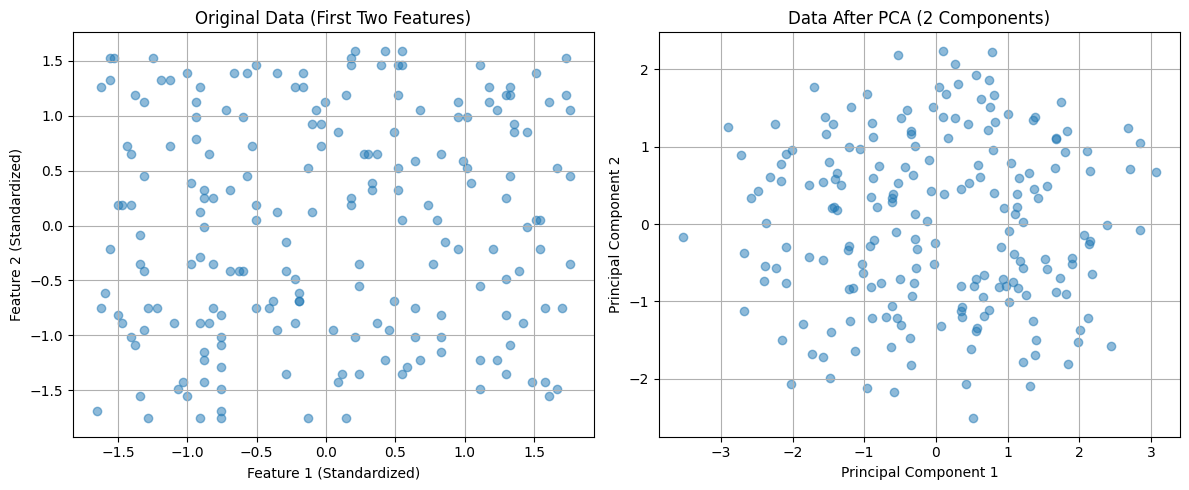

In [7]:
# Step 8: Visualize Before and After PCA
import matplotlib.pyplot as plt

# Plot original data (first two features for simplicity)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.5)
plt.title('Original Data (First Two Features)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.grid(True)

# Plot reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.title(f'Data After PCA ({num_components} Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()